<a href="https://colab.research.google.com/github/DaniyalK03/HPC/blob/main/HPC_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Techniques of High-Performance Computing (Assignment 1)

**Submission by SN: 21015796**

## Introduction

The following notebook is submitted coursework for PHAS0102.

This notebook compares the time taken for matrix multiplication to be performed by different functions.


The functions are tested for performance across varying dimensions of square matrices (ranging from **2 x 2** to **1000 x 1000**) with randomised real number elements. The results have been plotted using matplotlib.


The example function "*slow_matrix product*" has been reproduced as allowed by the assignment [1].


*  In **Part 1**, a "*faster_matrix_product*" has been created and is tested to be functioning correctly using asserts in a function "*assert_test*". The "*timeit*" function is then used to compare time the performance of the new "*faster_matrix_product*" function to the given "*slow_matrix_product*" function when tested on randomised 10 x 10 matrices. A "*func_time_test*" function compares average time taken per loop of "*timeit*" for the two functions when tested across different sized random matrices.

*   In **Part 2**, a "*numba_matrix_product*" is created which adapts the "*faster_matrix_product*" to utilise the Just-In-Time compilation using "*njit*" from "*Numba*". A "*numpy_matrix_product*" is also defined which simply uses the "*@*" matrix multiplication from "*Numpy*". A function "*func_time_test_faster*" compares the performance of the Part 1 "*faster_matrix_product*" against that of the "*numba_matrix_product*" & "*numpy_matrix_product*" functions. Finally, the performance of the "*numba_matrix_product*" is compared for when the style of matrices is permuted for all possible combinations of C-style and Fortran-style matrices to be multiplied.

### Bibliography

**[1]** A. Al-Refaie, "Assignment 1", *PHAS0102*, 2024

## Part 1


In [ ]:
##################################################################################################

# Importing backend libraries and functions for Part 1.
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt

# Importing additional backend libraries and functions for Part 2.
import numba

In [ ]:
# Code below has been reproduced from official PHAS0102 Material by Module Lead [1]

# This is the example "slow" matrix product that is used as a comparison and has not been edited.

def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

print(slow_matrix_product(matrix1, matrix2))
print(matrix1 @ matrix2)

[[1.74910034 1.49606715 1.93444244 2.48717495 1.30066667 1.70716117
  2.04859798 2.19722374 2.76323915 1.83218335]
 [2.12711453 1.68215894 1.74878436 2.50235983 2.04920625 1.78741058
  2.65984449 1.76398297 2.91809044 2.12287518]
 [2.81998564 2.87793138 2.32631709 3.08996715 1.94316414 2.35975925
  2.87482962 2.68793463 3.94214507 2.55382628]
 [2.63191788 2.59488844 2.7869939  3.56824542 2.46899672 2.24174236
  2.99320597 2.8339357  3.83530858 2.5015032 ]
 [2.65629051 2.72574022 2.18804229 2.98349984 2.0950252  2.07095247
  2.61737715 2.29387584 3.59152227 2.46137633]
 [1.86416722 2.02675433 1.20591007 1.96681199 1.42786435 1.44976748
  1.4651588  1.25953325 2.31319183 1.79529774]
 [2.54760204 2.33662984 2.16635233 3.10390844 2.23638223 2.04854934
  2.65154433 2.22199372 3.38339687 2.42590045]
 [2.2725674  2.03921797 2.19533144 2.43688686 1.89465904 1.5948101
  2.11915067 1.81434742 3.03484785 2.14864507]
 [2.88799999 2.61260288 2.78365671 3.65953874 2.28753475 2.54902508
  3.4229682  

### Assert Testing

An assert is used to test the functions are outputting correct results for the matrix multiplication by ensuring they meet the dimensionality constraints as outlined below:

\begin{align}
\begin{bmatrix}
A_{11} & \cdots & A_{1m}\\
\vdots & \ddots & \vdots \\
A_{n1} & \cdots & A_{nm}
\end{bmatrix}
\begin{bmatrix}
B_{11} & \cdots & B_{1p}\\
\vdots & \ddots & \vdots \\
B_{m1} & \cdots & B_{mp}
\end{bmatrix}
=
\begin{bmatrix}
C_{11} & \cdots & C_{1p}\\
\vdots & \ddots & \vdots \\
C_{n1} & \cdots & C_{np}
\end{bmatrix}
\end{align}

This is forced as a constraint as by definition for matrix multiplication between **A** & **B**,

**A** (Dimensions: n x m) can only be multiplied with **B** (Dimensions: m x p) if they share dimension "m" so that **C** (Dimensions: n x p) is the correct result.

It is trivial for square matrices when testing, however, is necessary to prove the functions work for matrices of general dimensions as inputs.

The function below "*assert_test*" uses the same dimensionality constraints.

In [ ]:
def assert_test(func, array):
  """

  This function asserts a given function gives a result almost equal to that of the Numpy @ function for random matrices.

  Inputs: func = Matrix multiplication function.
          array = Array of dimensions that will form the dimensions for the randomised square matrices to be tested.

  Outputs:"Test Passed" = A string to confirm that the Assert has raised no errors.

  """

  for i in array:
    # Generate 2 random matrices for the given dimension.
    test_mat1 = np.random.rand(int(i), int(i))
    test_mat2 = np.random.rand(int(i), int(i))

    # Almost equal to accommodate rounding from floating points precision.
    npt.assert_array_almost_equal(test_mat1 @ test_mat2, func(test_mat1,test_mat2))
  return(f"Test passed for dimensions from {int(array[0])} x {int(array[0])} to {int(array[-1])} x {int(array[-1])}")

# Creating an array to test function with asserts for randomised matrices of dimensions from 2 x 2 to 5 x 5.
assert_array = np.linspace(2,5,4)
assert_test(slow_matrix_product, assert_array)

'Test passed for dimensions from 2 x 2 to 5 x 5'

In [ ]:
# Generating 2 randomised 10 x 10 matrices to compare times for slow and fast matrix product functions later.

A = np.random.rand(10,10)
B = np.random.rand(10,10)

### timeit

The %timeit function is important to understand as it gives the performance metric (time taken per loop) for comparing the functions in this notebook. There are 2 main parameters to understand:

$$ n = \text{Number of Loops} $$
$$ r = \text{Number of Runs} $$

The %timeit function times how long a function takes to be executed **n** times and then divides by **n** to work out the time taken to execute the function once (time per loop).

One such iteration is a run.

The averaging process is repeated for **r** number of runs. The runs with the lowest times are used as these are meant to be the runs where the interruptions to the CPU from other tasks are minimal and hence the time per loop is most accurate.

A mean and standard deviation for time taken per loop is calculated across these runs to give an Average time per loop.

In [ ]:
# Timing the slow_matrix_product with 100 loops across 7 runs.
slow_t = %timeit -o -q -n 100 -r 7 slow_matrix_product(A,B)
print(f"Timing for the Slow Matrix Product: {slow_t}")

Timing for the Slow Matrix Product: 1.79 ms ± 515 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def faster_matrix_product(mat1, mat2):
  """

  This function is a faster method of matrix multiplication that uses a nested for loop.

  Inputs: mat1 = First matrix to be multiplied.
          mat2 = Second matrix to be multiplied.

  Outputs:result = Third matrix which is the result of the operation.

  """

  assert mat1.shape[1] == mat2.shape[0]
  result = np.empty((mat1.shape[0], mat2.shape[1])) # Initialising empty array to be dimensions of outputted array.
  for r in range(mat1.shape[0]):
    for c in range(mat2.shape[1]):
      value = np.dot(mat1[r,:],mat2[:,c])
      result[r,c] = value # Assigning value as element in resulting matrix.
  return result

In [ ]:
# Using assert test to confirm function works as intended.
assert_test(faster_matrix_product, assert_array)

'Test passed for dimensions from 2 x 2 to 5 x 5'

In [ ]:
# Timing the faster_matrix_product with 100 loops across 7 runs.
faster_t = %timeit -o -q -n 100 -r 7 faster_matrix_product(A,B)
print(f"Timing for the Faster Matrix Product: {faster_t}")

Timing for the Faster Matrix Product: 1.18 ms ± 489 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Faster Matrix Product

The "*faster_matrix_product*" function is quicker than the "*slower_matrix_product*" for several reasons as seen from the %timeit results displaying the average time per loop as much shorter for the "*faster_matrix_product*" compared to the "*slower_matrix_product*".

The difference in the performance can be attributed primarily to the difference in the function structure:

*   The "*slower_matrix_product*" has a triple-nested for loop structure hence the time complexity is of cubic order - $O(n^3)$. This means that the number of iterations required, thus time, grows cubically causing this function to be slow.
*   The "*faster_matrix product*" has a double-nested for loop structure hence the time complexity is of quadratic order - $O(n^2)$. This means that the number of iterations required, thus time, grows quadratically causing this function to be quicker.

The "*faster_matrix_product*" function also assigns values of the resulting matrix to the calculated values.

The "*slower_matrix_product*" function initialises a value, updates it to the calculated value and then appends it to the result which is then transposed. This is time-consuming and resource-intensive.

The "*faster_matrix_product*" function also uses the "*dot*" function from "*Numpy*" which utilises low-level libraries to optimise linear algebra operations. This is more obvious in Part 2.

Below, the "*func_time_test*" function is set up to compute the average time per loop and associated standard deviations for the functions.

Due to the inefficiency of the "*slower_matrix_product*" function, only n=1 is used in testing therefore the "*slower_matrix_product*" timings have no standard deviation.



In [ ]:
def func_time_test(func1, func2):
  """

  This function takes in 2 functions and tests them using randomised square matrices of specified dimensions.

  Inputs: func1 = First function being tested.
          func2 = Second function being tested.

  Outputs:Data arrays that allow a comparison of the time taken for the two functions to compute outputs for given matrices.
          Arrays are of average time per loop and standard deviation for each function.

  """

  # Array of dimensions that form the dimensions of the randomised square matrices to be tested.
  mat_test_array = [2, 3, 4, 5, 10, 20, 50, 75, 100, 200, 300, 400, 500, 750, 1000]

  # Initialising empty dynamic arrays to hold the average time per loop and standard deviation values.
  func1_time_array = []
  func1_std_array = []

  func2_time_array = []
  func2_std_array = []


  for i in mat_test_array:
    test_mat1 = np.random.rand(int(i), int(i))
    test_mat2 = np.random.rand(int(i), int(i))

    func1_time = %timeit -o -q -n 1 -r 1 func1(test_mat1,test_mat2) # Timing using a single loop over a single run for brevity.
    func2_time = %timeit -o -q -n 10 -r 1 func2(test_mat1,test_mat2) # Timing using 10 loops over a single run for brevity.

    # Appending the average times per loop and standard deviations.
    func1_time_array.append(func1_time.average)
    func1_std_array.append(func1_time.stdev)

    func2_time_array.append(func2_time.average)
    func2_std_array.append(func2_time.stdev)

  return (mat_test_array, func1_time_array, func1_std_array, func2_time_array, func2_std_array)

In [ ]:
# Comparing the timing for the Slow Matrix Product and Faster Matrix Product functions.
sf_test = func_time_test(slow_matrix_product, faster_matrix_product);

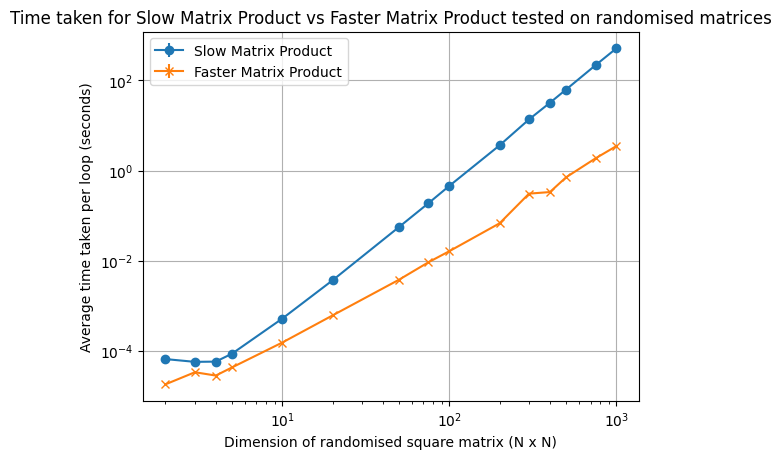

In [ ]:
# Plotting and labelling the results from the timing function.
plt.grid()
plt.title(f"Time taken for Slow Matrix Product vs Faster Matrix Product tested on randomised matrices")
plt.xscale("log")
plt.yscale("log")
plt.errorbar(sf_test[0], sf_test[1], xerr=None, yerr=sf_test[2], fmt="o-", label="Slow Matrix Product")
plt.errorbar(sf_test[0], sf_test[3], xerr=None, yerr=sf_test[4], fmt="x-", label="Faster Matrix Product")
plt.xlabel("Dimension of randomised square matrix (N x N)")
plt.ylabel("Average time taken per loop (seconds)")
plt.legend(loc="best");

Plotted above are the results calculated for the average time taken per loop for the "*faster_matrix_product*" function compared to the "*slow_matrix_product*" function when tested on randomised square matrices of dimensions:

**[2, 3, 4, 5, 10, 20, 50, 75, 100, 200, 300, 400, 500, 750, 1000]**

In terms of the "*slow_matrix_product*" function, time increases exponentially for an increase in dimension size therefore for brevity, only 2 matrices dimensionally greater than 500 x 500 are tested.

Graphically, it can be seen that the "*slow_matrix_product*" function is relatively similar in timing to the "*faster_matrix_product*" function when tested on matrices of sizes up to 10 x 10.

The timings of the functions begin to diverge from this point onwards such that eventually the "*faster_matrix_product*" takes nearly 2 orders of magnitude of time less than the "*slow_matrix_product*" to compute a randomised 1000 x 1000 matrix.

This clearly displays the difference in performance of the functions as attributed to the change in complexity from $O(n^3)$ to $O(n^2)$.

## Part 2

### Numba

Python innately features the Global Interpreter Lock (**GIL**) which means that code written in Python passes through the interpreter during execution. Numba enables us to use Just-In-Time compilation (**JIT**) to translate the Python function into low-level machine code, bypassing the **GIL** to speed up execution.

In Numba, **JIT** can be applied in the following ways:


*   "*@jit*" decorator - Flexible as it translates Python functions to machine code where possible, however, if parts of the function require the interpreter then this can be used.  
*   "*@njit*" decorator - Strictly applies **JIT** in No-Python mode to maximise performance, returning errors if any part of the function cannot be translated to machine code.

The "*numba_matrix_product*" utilises the "*@njit*" decorator to adapt the "*faster_matrix_product*" function (from **Part 1**) and as this returns no error, it is used moving forward.


In [ ]:
@numba.njit
def numba_matrix_product(mat1, mat2):
  """

  A faster method of matrix multiplication using (No-Python) JIT compilation.

  Inputs: mat1 = First matrix to be multiplied
          mat2 = Second matrix to be multiplied

  Outputs:result = Third matrix which is result of the operation

  """

# Same structure as Faster Matrix Product function from Part 1.
  assert mat1.shape[1] == mat2.shape[0]
  result = np.empty((mat1.shape[0], mat2.shape[1]))
  for r in range(mat1.shape[0]):
    for c in range(mat2.shape[1]):
      value = np.dot(mat1[r,:],mat2[:,c])
      result[r,c] = value
  return result

In [ ]:
# Defining a function to call later for timing
def numpy_matrix_product(mat1, mat2):
  """

  This function simply returns the result of the Numpy matrix product for two given matrices.

  Inputs: mat1 = First matrix to be multiplied.
          mat2 = Second matrix to be multiplied.

  Outputs:result = Third matrix which is the result of the operation

  """

  result = mat1 @ mat2
  return result

In [ ]:
# New timing function adapted from func_time_test from Part 1.
def func_time_test_faster(func1, func2, func3):
  """

  This function takes in 3 functions and tests them using randomised square matrices of specified dimensions.

  Inputs: func1 = First function being tested
          func2 = Second function being tested
          func3 = Third function being tested

  Outputs:Data arrays that allow a comparison of the time taken for the three functions to compute outputs for given matrices.
          Arrays are of average time per loop and standard deviation for each function.

  """
  # Array of dimensions that form the dimensions of the randomised square matrices to be tested.
  mat_test_array = [2, 3, 4, 5, 10, 20, 50, 75, 100, 200, 300, 400, 500, 750, 1000]

  # Initialising empty dynamic arrays to hold the average time per loop and standard deviation values.
  func1_time_array = []
  func1_std_array = []

  func2_time_array = []
  func2_std_array = []

  func3_time_array = []
  func3_std_array = []


  for i in mat_test_array:
    test_mat1 = np.random.rand(int(i), int(i))
    test_mat2 = np.random.rand(int(i), int(i))

    # Timing using 10 loops over 3 runs as faster functions should be less time consuming.
    func1_time = %timeit -o -q -n 10 -r 3 func1(test_mat1,test_mat2)
    func2_time = %timeit -o -q -n 10 -r 3 func2(test_mat1,test_mat2)
    func3_time = %timeit -o -q -n 10 -r 3 func3(test_mat1,test_mat2)

    # Appending the average times per loop and standard deviations.
    func1_time_array.append(func1_time.average)
    func1_std_array.append(func1_time.stdev)

    func2_time_array.append(func2_time.average)
    func2_std_array.append(func2_time.stdev)

    func3_time_array.append(func3_time.average)
    func3_std_array.append(func3_time.stdev)

  return (mat_test_array, func1_time_array, func1_std_array, func2_time_array, func2_std_array, func3_time_array, func3_std_array)

In [ ]:
# Comparing the timing for the Faster Matrix Product, Numba JIT Matrix Product and Numpy @ Matrix Product functions.
nbnp_test = func_time_test_faster(faster_matrix_product, numba_matrix_product, numpy_matrix_product);

<ipython-input-12-cddab144a479>:19: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  value = np.dot(mat1[r,:],mat2[:,c])


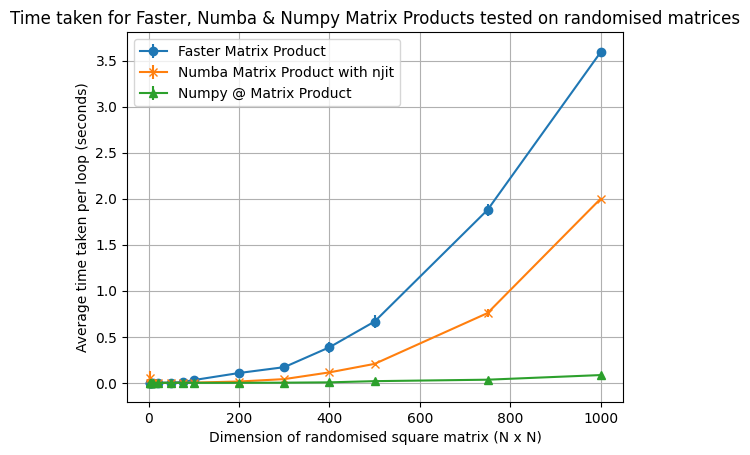

In [ ]:
# Plotting and labelling the results from the new timing function.
plt.grid()
plt.title(f"Time taken for Faster, Numba & Numpy Matrix Products tested on randomised matrices")
#plt.xscale("log")
#plt.yscale("log")
plt.errorbar(nbnp_test[0], nbnp_test[1], xerr=None, yerr=nbnp_test[2], fmt="o-", label="Faster Matrix Product")
plt.errorbar(nbnp_test[0], nbnp_test[3], xerr=None, yerr=nbnp_test[4], fmt="x-", label="Numba Matrix Product with njit")
plt.errorbar(nbnp_test[0], nbnp_test[5], xerr=None, yerr=nbnp_test[6], fmt="^-", label="Numpy @ Matrix Product")
plt.xlabel("Dimension of randomised square matrix (N x N)")
plt.ylabel("Average time taken per loop (seconds)")
plt.legend(loc="best");

Testing along the same set of dimensions for randomised square matrices as in **Part 1**, it can be seen all the functions are relatively quick.

The functions are similar in performance for matrices of sizes up to 100 x 100 after which the timings diverge.

It can be seen when tested for a 1000 x 1000 matrix, the Numba JIT function takes approximately half the time that the "*faster_matrix_product*" function does.

The fastest function by far is the Numpy @ function. This is attributed to Numpy using low-level libraries like Basic Linear Algebra Subprograms (**BLAS**) and Linear Algebra Package (**LAPACK**), which use specialised CPU instructions to highly optimise linear algebra operations.

In [ ]:
# New timing function adapted from func_time_test_faster.
def cf_test(func):
  """

  This function takes in a function and tests them using randomised square matrices of specified dimensions for different permutations of C and Fortran Style Matrices.

  Inputs: func1 = Function being tested

  Outputs:Data arrays that allow a comparison of the time taken for the four permuations to compute outputs for given matrices.
          Arrays are of average time per loop and standard deviation for each function.

  """

  # Array of dimensions that form the dimensions of the randomised square matrices to be tested.
  mat_test_array = [2, 3, 4, 5, 10, 20, 50, 75, 100, 200, 300, 400, 500, 750, 1000]


  # Initialising empty dynamic arrays to hold the average time per loop and standard deviation values.
  cc_time_array = []
  fc_time_array = []
  cf_time_array = []
  ff_time_array = []

  cc_std_array = []
  fc_std_array = []
  cf_std_array = []
  ff_std_array = []

  for i in mat_test_array:
    test_mat1 = np.random.rand(int(i), int(i))
    test_mat2 = np.random.rand(int(i), int(i))

    # Timing using 10 loops over 3 runs as faster functions should be less time consuming.
    cc_time = %timeit -o -q -n 10 -r 3 func(test_mat1,test_mat2)
    fc_time = %timeit -o -q -n 10 -r 3 func(np.asfortranarray(test_mat1),test_mat2)
    cf_time = %timeit -o -q -n 10 -r 3 func(test_mat1,np.asfortranarray(test_mat2))
    ff_time = %timeit -o -q -n 10 -r 3 func(np.asfortranarray(test_mat1),np.asfortranarray(test_mat2))

    # Appending the average times per loop and standard deviations.
    cc_time_array.append(cc_time.average)
    cc_std_array.append(cc_time.stdev)

    fc_time_array.append(fc_time.average)
    fc_std_array.append(fc_time.stdev)

    cf_time_array.append(cf_time.average)
    cf_std_array.append(cf_time.stdev)

    ff_time_array.append(ff_time.average)
    ff_std_array.append(ff_time.stdev)

  return (mat_test_array, cc_time_array, cc_std_array, fc_time_array, fc_std_array, cf_time_array, cf_std_array, ff_time_array, ff_std_array)

In [ ]:
# Comparing the timing for the permutations of the C and Fortran style matrices using the Numba JIT function.
cf_plot = cf_test(numba_matrix_product)

<ipython-input-12-cddab144a479>:19: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  value = np.dot(mat1[r,:],mat2[:,c])
<ipython-input-12-cddab144a479>:19: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'F', False, aligned=True))
  value = np.dot(mat1[r,:],mat2[:,c])


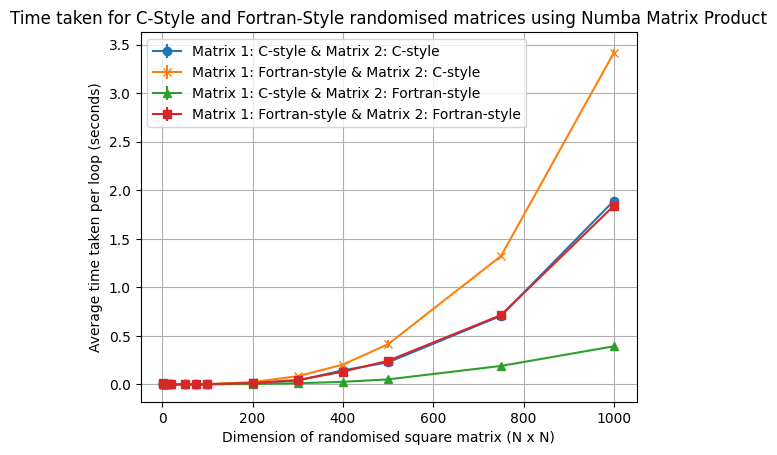

In [ ]:
# Plotting and labelling the results from the new function.
plt.grid()
plt.title(f"Time taken for C-Style and Fortran-Style randomised matrices using Numba Matrix Product")
#plt.xscale("log")
#plt.yscale("log")
plt.errorbar(cf_plot[0], cf_plot[1], xerr=None, yerr=cf_plot[2], fmt="o-", label="Matrix 1: C-style & Matrix 2: C-style")
plt.errorbar(cf_plot[0], cf_plot[3], xerr=None, yerr=cf_plot[4], fmt="x-", label="Matrix 1: Fortran-style & Matrix 2: C-style")
plt.errorbar(cf_plot[0], cf_plot[5], xerr=None, yerr=cf_plot[6], fmt="^-", label="Matrix 1: C-style & Matrix 2: Fortran-style")
plt.errorbar(cf_plot[0], cf_plot[7], xerr=None, yerr=cf_plot[8], fmt="s-", label="Matrix 1: Fortran-style & Matrix 2: Fortran-style")
plt.xlabel("Dimension of randomised square matrix (N x N)")
plt.ylabel("Average time taken per loop (seconds)")
plt.legend(loc="best");

It is necessary to outline **C-style** and **Fortran-style** matrix storage in memory to understand these results.

Consider:

\begin{align}
M=
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}
\end{align}



*   **C-style** stores the matrix in memory cache as: $M$ = **[1 2 3 4]**
*   **Fortran-style** stores the matrix in memory cache as: $M$ = **[1 3 2 4]**

Matrix multiplication is calculated using the elements from the rows of matrix 1 and the elements from the columns of matrix 2.

**C-style** stores all elements of each row sequentially so they are readily available for the row aspect of the calculation.

**Fortran-style** stores all elements of each column sequentially so they are readily available for the column aspect of the calculation.

It is therefore computationally efficient to store Matrix 1 as **C-style** and Matrix 2 as **Fortran-style** as when the CPU parses through the data in the cache, both the row and column elements are sequentially stored and thus the elements for the calculation are immediately accessible.

For the same reasons, it would be computationally inefficient to store Matrix 1 as **Fortran-style** and Matrix 2 as **C-style** as the data would not be so readily available and time would be wasted in accessing the correct elements required for the calculation from the memory cache.

This can be seen in the above plots with Matrix 1: **C-style** & Matrix 2: **Fortran-style** yielding the quickest times (*best performance*) and Matrix 1: **Fortran-style** & Matrix 2: **C-style** the longest times (*worst performance*) with combinations of both **C-style** or **Fortran-style** yielding identically intermediate performance for 1000 x 1000 matrices.
These effects are minimal in impacting performance when tested on matrices of size 200 x 200 or less.

## Conclusion

This notebook has analysed the performance of various matrix multiplication functions and provided reasoning for the tests throughout.

**Part 1** has analysed the performance of the "*slow_matrix_product*" function against that of a created "*faster_matrix_product*" function. It succeeded in proving that whilst differences may be negligible when tested on low dimension randomised matrices, the change in time-complexity, which arises from the different functional structures, leads to significant differences in performance for higher dimensional matrix multiplication.

**Part 2** has analysed the performance gains from utilising Numba **JIT** compilation to improve the function created in **Part 1**. This is compared to the Numpy @ function and reasoning for the difference in timings for the three functions is provided by linking to ideas of the role of the **GIL** and the  **BLAS** & **LAPACK** low-level libraries.

Finally, **Part 2** compares performance between permutations of **C-style** and **Fortran-style** memory storage for the matrices being tested through the "*numba_matrix_product*" function and reasonings for the performance differences are also outlined.

This work could be expanded upon by considering the further optimisation of the "*numba_matrix_product*" function to force the first inputted matrix as a **C-style** matrix stored in memory and the second inputted matrix as a **Fortran-style** matrix stored in memory to reduce average times per loop further.

Overall, the notebook has shown while differences in matrix multiplication functions are minimal when tested on low dimensional data, the differences are significant when higher dimensional calculations are performed and various factors contribute to this.